In [143]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #3Dplot

%matplotlib inline

In [234]:
class LinearModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def show(self, figsize=(10, 6)):
        self.fit()
        score = self.score(self.X, self.y)
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        fig_x = np.linspace(self.X.min(), self.X.max(), 40)
        fig_y = self.predict(fig_x)
        intercept = self.intercept
        operation = '+' if intercept > 0 else '-'
        print(f'==== R-squared: {round(score[0], 4)} ====')
        print(f'==== coefficiient: {round(self.coefficient[0], 4)}x {operation} {str(round(self.intercept, 4)).replace("-", "")} ====')
        ######## It's difficult for me to treat this text position ###########
#         ax.text(0, 0.1, f'score = {round(score[0], 4)}')
#         coef = round(self.coefficient[0], 4)
#         text = f'y = {coef}x'
#         intercept = round(self.intercept, 4) 
#         if intercept > 0:
#             text += f'+ {intercept}'
#         else:
#             text += f' {intercept}'
#         ax.text(0, 0.25, text)
        ax.plot(self.X, self.y, "o")
        ax.plot(fig_x, fig_y, "r")
        plt.show()
        return self
        
    def fit(self):
        sum_of_variance_x = sum( (self.X - self.X.mean()) ** 2 )
        sum_of_covariance_xy = sum( (self.X - self.X.mean()) * (self.y - self.y.mean()) )
        self.coefficient = sum_of_covariance_xy / sum_of_variance_x
        self.intercept = self.y.mean() - sum(self.coefficient * self.X.mean())
        return self
    
    def predict(self, X):
        return self.coefficient * X + self.intercept
    
    def score(self, X, y):
        predicts = self.predict(X)
        explained_sum_of_squares = sum( (predicts - y.mean()) ** 2 )
        total_sum_of_squares = sum( (y - y.mean()) ** 2 )
        return explained_sum_of_squares / total_sum_of_squares

class MultipleLinearModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def show(self, figsize=(10, 10)):
        self.fit()
        score = self.score(self.X, self.y)
        fig = plt.figure(figsize=figsize)
        ax = Axes3D(fig)
        x1 = self.X[:, 0]
        x2 = self.X[:, 1]
        ax.scatter3D(x1, x2, self.y)
        mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max() - x1.min())/20)
        mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max() - x2.min())/20)
        mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
        mesh_x = np.concatenate([mesh_x1.reshape(-1, 1), mesh_x2.reshape(-1, 1)], axis=1)
        mesh_y = (mesh_x @ self.coefficients + self.intercept).reshape(mesh_x1.shape)
        ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y, color='red', alpha=0.3)
        print(f'==== R-squared: {round(score[0], 4)} ====')
        print(f'==== coefficient: {np.round(self.coefficients.T, 4)} ====')
        print(f'==== intercept: {np.round(self.intercept, 4)[0]} ====')
        ######## It's difficult for me to treat this text position ###########
#         ax.text(1, 2, 10, f'score = {round(score[0], 4)}')
#         for index, coefficient in enumerate(self.coefficients):
#             if index:
#                 text += f'+ {round(coefficient[0], 4)}x'
#             else:
#                 text = f'y = {round(coefficient[0], 4)}x'
#         text += f'+ {round(self.intercept[0], 4)}'
#         ax.text(1, 2, 11, text)
        plt.show()
        return self
        
    def fit(self):
        X = np.insert(self.X, 0, 1, axis=1)
        weights = np.linalg.pinv(X.T @ X) @ X.T @ self.y
        self.coefficients = weights[1::]
        self.intercept = weights[0]
    
    def predict(self, X):
        return X @ self.coefficients + self.intercept
    
    def score(self, X, y):
        predict = self.predict(X)
        explained_sum_of_squares = sum( (predict - y.mean()) ** 2 )
        total_sum_of_squares = sum( (y - y.mean()) ** 2 )
        return explained_sum_of_squares / total_sum_of_squares

==== R-squared: 0.9745 ====
==== coefficiient: 3.984x - 4.7013 ====


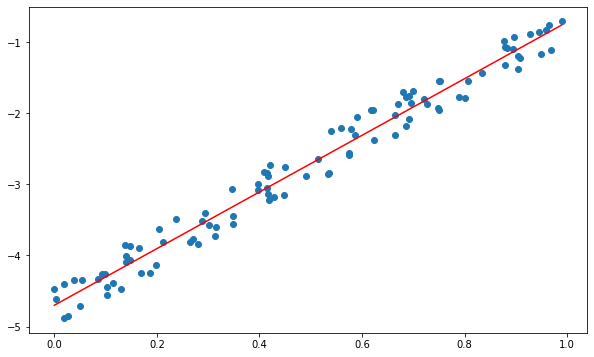

==== R-squared: 0.9864 ====
==== coefficient: [[-3.0203 -4.9776]] ====
==== intercept: -9.6966 ====


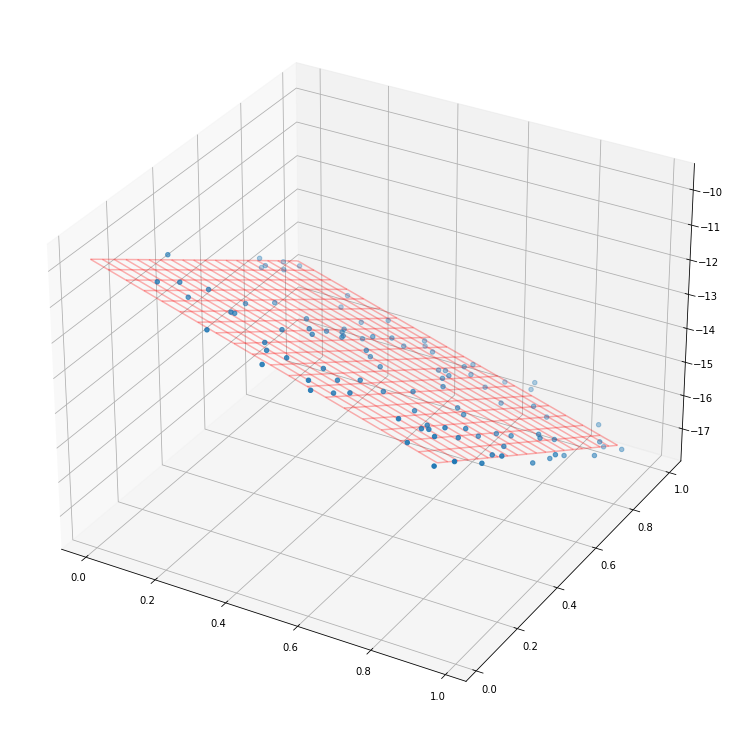

In [246]:
if __name__ == '__main__':
    np.random.seed(1)
    ### data1 ###
    print('=' * 100)
    X = np.random.rand(100, 1)
    noise = np.random.rand(100, 1) * 0.6
    true_y = 4 * X - 5
    y = true_y + noise
    linear_model = LinearModel(X, y).show()
    print('=' * 100)
    
    ### data2 ###
    print('=' * 100)
    x1 = np.random.rand(100, 1)
    x2 = np.random.rand(100, 1)
    noise = np.random.rand(100, 1) * 0.6
    true_y = -3 * x1 - 5 * x2 - 10
    y = true_y + noise 
    X = np.hstack([x1, x2])
    multiple_linear_model = MultipleLinearModel(X, y).show()
    print('=' * 100)